<a href="https://colab.research.google.com/github/tejask-42/Speech-Emotion-Recognition-Project/blob/main/Week_3/WiDS_RNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This time we will be implementing an RNN model.

Time series forcasting is an important topic in Machine Learning.\
In this, we will are given the data for sunspots from jan 1749 to dec 1983.\
we will be dividing this data in to two parts, one for training our model and second for testing our model.\
In time series forcasting, we will have to take continuous data and not randomized data, because we have to predict on the basis of given past data.

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=53b054c8476515494781e570eeede0f12731b8a6bb1fb36153821a1d55a5f514
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [5]:
import pandas as pd
import numpy as np
import wget
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import math

We will have to take the data from the url given.

You have to implement the get_train_test function and return train_data and test_data, scaled in the range [0,1]

To scale the data, read on MinMaxScalar class in sklearn.preprocessing

Testing data should be the first 80 percent values and rest should be testing data. Also, convert the index of the data to datetime

In [3]:
from sklearn.preprocessing import MinMaxScaler
def get_train_test(url):
    wget.download(url, "sunspots.csv")
    df = pd.read_csv("sunspots.csv")
    df["Month"] = pd.to_datetime(df["Month"], format="%Y-%m")
    df.set_index("Month", inplace=True)
    scaler = MinMaxScaler(feature_range=(0, 1))
    df = scaler.fit_transform(df)
    train_data = df[:int(len(df) * 0.8)]
    test_data = df[int(len(df) * 0.8):]
    return train_data, test_data

Now we will take the data from your implemented function :)

In [4]:
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data = get_train_test(sunspots_url)

X_train = train_data[:-1].reshape(-1, 1, 1)
y_train = train_data[1:].reshape(-1, 1, 1)

X_test = test_data[:-1].reshape(-1, 1, 1)
y_test = test_data[1:].reshape(-1, 1, 1)

Now let's make the model for our computations.

The model will consist of a layer of RNN of 64 nodes followed by a layer of Feed Forward Neural Network of one output node.

For compiling the node, we will use mean squared error as loss and mean absolute error as metric. We will not use accuracy as the metric. Think on why :)

In [7]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(1, 1), activation='tanh'))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# train the model on the X_train dataset
model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1)

# predict the values for training and testing data
train_predict = model.predict(X_train).flatten()
test_predict = model.predict(X_test).flatten()

Epoch 1/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0222 - mae: 0.1039
Epoch 2/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - mae: 0.0456
Epoch 3/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - mae: 0.0459
Epoch 4/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040 - mae: 0.0452
Epoch 5/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - mae: 0.0445
Epoch 6/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - mae: 0.0458
Epoch 7/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - mae: 0.0461
Epoch 8/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - mae: 0.0450
Epoch 9/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - mae: 0.0454
Epoch 10/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - mae: 0.0439
Epoch 11/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - mae: 0.0472
Epoch 12/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - mae: 0.0439
Epoch 13/200


Now let's print out what you have done :)

Train RMSE: 0.063 RMSE
Test RMSE: 0.079 RMSE


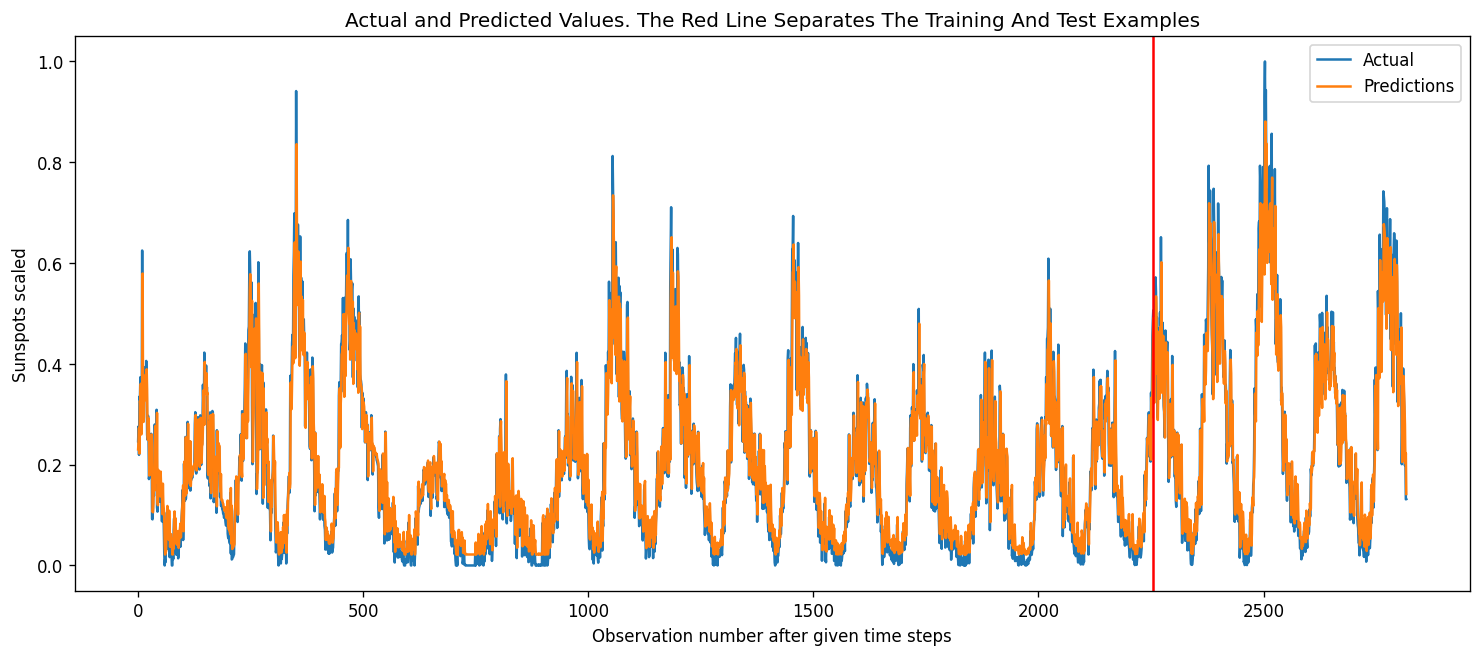

In [9]:
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


train_rmse = math.sqrt(mean_squared_error(y_train.flatten(), train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test.flatten(), test_predict))

print('Train RMSE: %.3f RMSE' % (train_rmse))
print('Test RMSE: %.3f RMSE' % (test_rmse))

actual = np.append(y_train.flatten(), y_test.flatten())
predictions = np.append(train_predict, test_predict)
rows = len(actual)
plt.figure(figsize=(15, 6), dpi=120)
plt.plot(range(rows), actual)
plt.plot(range(rows), predictions)
plt.axvline(x=len(y_train), color='r')
plt.legend(['Actual', 'Predictions'])
plt.xlabel('Observation number after given time steps')
plt.ylabel('Sunspots scaled')
plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plt.show()